In [2]:
#Loading dataset

import pandas as pd
climate = pd.read_csv('C:/Users/Kuba/Desktop/projekt_KWD/pop_failures.dat', delimiter='\s+')

C:\Users\Kuba\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
climate.head()

,Study,Run,vconst_corr,vconst_2,vconst_3,vconst_4,vconst_5,vconst_7,ah_corr,ah_bolus,...,efficiency_factor,tidal_mix_max,vertical_decay_scale,convect_corr,bckgrnd_vdc1,bckgrnd_vdc_ban,bckgrnd_vdc_eq,bckgrnd_vdc_psim,Prandtl,outcome
0,1,1,0.859036,0.927825,0.252866,0.298838,0.170521,0.735936,0.428325,0.567947,...,0.245675,0.104226,0.869091,0.997518,0.448620,0.307522,0.858310,0.796997,0.869893,0
1,1,2,0.606041,0.457728,0.359448,0.306957,0.843331,0.934851,0.444572,0.828015,...,0.616870,0.975786,0.914344,0.845247,0.864152,0.346713,0.356573,0.438447,0.512256,1
2,1,3,0.997600,0.373238,0.517399,0.504993,0.618903,0.605571,0.746225,0.195928,...,0.679355,0.803413,0.643995,0.718441,0.924775,0.315371,0.250642,0.285636,0.365858,1
3,1,4,0.783408,0.104055,0.197533,0.421837,0.742056,0.490828,0.005525,0.392123,...,0.471463,0.597879,0.761659,0.362751,0.912819,0.977971,0.845921,0.699431,0.475987,1
4,1,5,0.406250,0.513199,0.061812,0.635837,0.844798,0.441502,0.191926,0.487546,...,0.551543,0.743877,0.312349,0.650223,0.522261,0.043545,0.376660,0.280098,0.132283,1


In [4]:
climate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 540 entries, 0 to 539
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Study                 540 non-null    int64  
 1   Run                   540 non-null    int64  
 2   vconst_corr           540 non-null    float64
 3   vconst_2              540 non-null    float64
 4   vconst_3              540 non-null    float64
 5   vconst_4              540 non-null    float64
 6   vconst_5              540 non-null    float64
 7   vconst_7              540 non-null    float64
 8   ah_corr               540 non-null    float64
 9   ah_bolus              540 non-null    float64
 10  slm_corr              540 non-null    float64
 11  efficiency_factor     540 non-null    float64
 12  tidal_mix_max         540 non-null    float64
 13  vertical_decay_scale  540 non-null    float64
 14  convect_corr          540 non-null    float64
 15  bckgrnd_vdc1          5

In [33]:
#Shape of feature and targets

data = climate.iloc[:,2:-1]
target = climate.iloc[:,-1]
print(data.shape)
print(target.shape)

(540, 18)
(540,)


In [34]:
#Plotting number of targets based on prediction (failure or success)

import numpy as np
failure = np.count_nonzero(climate['outcome'] == 0)
success = np.count_nonzero(climate['outcome'] == 1)

print(f"Liczba badan zakonczonych porazka: {failure}")
print(f"Liczba badan zakonczonych sukcesem: {success}\n")
print(f"Procent badan zakonczonych porazka: {round(failure/len(target)*100, 2)}%")
print(f"Procent badan zakonczonych sukcesem: {round(success/len(target)*100, 2)}%")

Liczba badan zakonczonych porazka: 46
Liczba badan zakonczonych sukcesem: 494

Procent badan zakonczonych porazka: 8.52%
Procent badan zakonczonych sukcesem: 91.48%


C:\Users\Kuba\AppData\Local\Temp\ipykernel_17568\1766039342.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='outcome', data=climate, palette='RdBu')


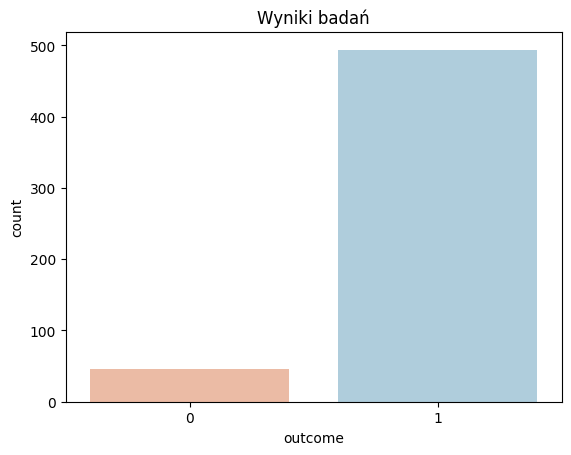

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='outcome', data=climate, palette='RdBu')
plt.title('Wyniki badań')
plt.show()

In [47]:
# Mean and Standard Deviation
print("---Mean---")
print(data.mean(axis=0))
print("---std---")
print(data.std(axis=0))

---Mean---
vconst_corr             0.500026
vconst_2                0.500097
vconst_3                0.500027
vconst_4                0.500119
vconst_5                0.500001
vconst_7                0.499913
ah_corr                 0.500059
ah_bolus                0.500076
slm_corr                0.500044
efficiency_factor       0.500111
tidal_mix_max           0.499984
vertical_decay_scale    0.500032
convect_corr            0.499933
bckgrnd_vdc1            0.499944
bckgrnd_vdc_ban         0.499946
bckgrnd_vdc_eq          0.500044
bckgrnd_vdc_psim        0.500020
Prandtl                 0.500021
dtype: float64
---std---
vconst_corr             0.288939
vconst_2                0.288922
vconst_3                0.289067
vconst_4                0.288993
vconst_5                0.288827
vconst_7                0.288852
ah_corr                 0.289010
ah_bolus                0.288909
slm_corr                0.288860
efficiency_factor       0.288966
tidal_mix_max           0.289127
vertica

In [48]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

In [49]:
print(scaled_data[1,:])
print(scaled_data.mean(axis=0))
print(scaled_data.std(axis=0))

[ 0.36725022 -0.14677799 -0.48677076 -0.66901575  1.18980639  1.50713966
 -0.19216597  1.13614635 -0.7048917   0.4044324   1.64717483  1.43486725
  1.19670398  1.26162865 -0.53085016 -0.49722074 -0.21329849  0.04237293]
[-4.88498131e-16  5.09880204e-17  5.83895072e-17 -3.56916143e-16
 -1.29114826e-16  8.88178420e-17 -3.94745964e-17 -6.57909941e-18
 -2.46716228e-16  1.31581988e-16 -4.93432455e-18  1.52964061e-16
 -1.16779014e-16  3.43346750e-16  9.53969414e-17 -2.53295327e-16
  8.88178420e-17  9.04626168e-17]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [50]:
# Splitting

from sklearn.model_selection import train_test_split

climate_train_data, climate_test_data, \
climate_train_target, climate_test_target = \
train_test_split(scaled_data, target, test_size=0.2)

In [51]:
print("Training dataset: ")
print(climate_train_data.shape)
print(climate_train_target.shape)

print("Testing dataset: ")
print(climate_test_data.shape)
print(climate_test_target.shape)

Training dataset: 
(432, 18)
(432,)
Testing dataset: 
(108, 18)
(108,)


In [52]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression

logistic_regression = LogisticRegression()
logistic_regression.fit(climate_train_data, climate_train_target)

LogisticRegression()

In [75]:
# Prediction

prediction = logistic_regression.predict(climate_test_data[40,:].reshape(1,-1))
print(f"Predykcja dla {40} symulacji: {prediction}")
print(f"Prawdziwa wartosc dla {40} symulacji: {climate_test_target[40]}\n")

prediction = logistic_regression.predict(climate_test_data[80,:].reshape(1,-1))
print(f"Predykcja dla {80} symulacji: {prediction}")
print(f"Prawdziwa wartosc dla {80} symulacji: {climate_test_target[80]}\n")

Predykcja dla 40 symulacji: [1]
Prawdziwa wartosc dla 40 symulacji: 1

Predykcja dla 80 symulacji: [1]
Prawdziwa wartosc dla 80 symulacji: 1



In [76]:
# Prediction probability

prediction_probability = logistic_regression.predict_proba(climate_test_data[11,:].reshape(1,-1))
print(prediction_probability)

[[0.00859817 0.99140183]]


In [77]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(climate_test_target, logistic_regression.predict(climate_test_data))
print(f"Model accuracy: {acc}")

Model accuracy: 0.9444444444444444


In [82]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(climate_test_target, logistic_regression.predict(climate_test_data))

true_negative = conf_matrix[0][0]
false_positive = conf_matrix[0][1]
false_negative = conf_matrix[1][0]
true_positive = conf_matrix[1][1]

print(f"Confusion Matrix: \n {conf_matrix} \n")

print(f"True Negative: {true_negative}")
print(f"False Positive: {false_positive}")
print(f"False Negative: {false_negative}")
print(f"True Positive: {true_positive}")

print("Correct predixtions: ", 
      round((true_negative + true_positive) / (true_negative + true_positive + false_negative + false_positive) * 100, 1), "%")

Confusion Matrix: 
 [[ 5  5]
 [ 1 97]] 

True Negative: 5
False Positive: 5
False Negative: 1
True Positive: 97
Correct predixtions:  94.4 %


In [84]:
from sklearn.model_selection import cross_val_score

score = cross_val_score(LogisticRegression(), climate_test_data, climate_test_target)
print(score.mean())

0.945021645021645
